In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# gathering the data
dataset = pd.read_table('fruit_data_with_colors.txt')
dataset.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# preparing data for classifier train
# in this part we decide what is ours variable and ours output variable
X = dataset[['mass', 'width', 'height']]
y = dataset['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [5]:
# import, instance KNN, training - Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
# import, instance KNN, training - Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 5)
knn_reg.fit(X_train, y_train)
# O parametro metric que no caso abaixo e minkowski corresponde ao metodo de calculo da distancia entre os pontos
# minkowski para p = 2 distancia euclidiana 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [8]:
# accuracy measure
knn.score(X_test, y_test)

0.5333333333333333

In [9]:
knn_reg.score(X_test, y_test)

0.31864406779661003

In [10]:
# using knn to make a prediction
dataLabeling = dict(zip(dataset.fruit_label.unique(), dataset.fruit_name.unique()))
dataLabeling
prediction = knn.predict([[122, 4.3, 4.7]])
dataLabeling[prediction[0]]

'lemon'

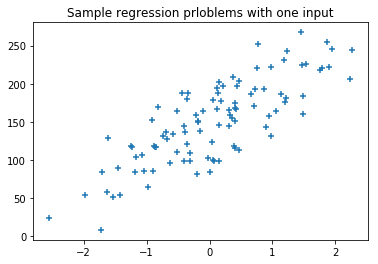

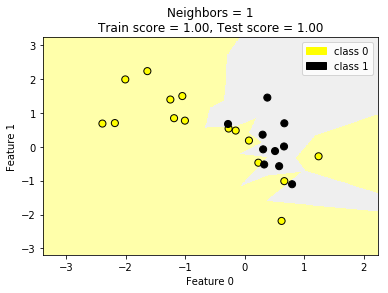

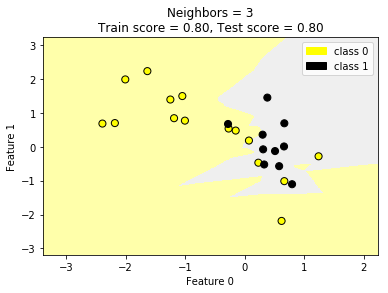

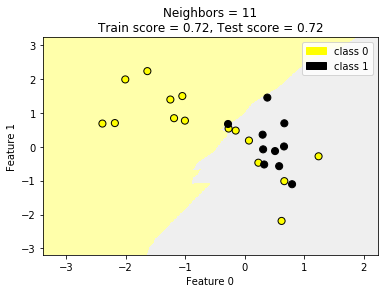

In [11]:
# preparing simple dataset and seeing the data(optional)
# syntetic datasets
from sklearn.datasets import make_classification  # modulo basico para sintetizar dados
from sklearn.datasets import make_regression  # modulo basico para sintetizar dados
from adspy_shared_utilities import plot_two_class_knn

plt.figure()
plt.title('Sample regression prloblems with one input')
X_simpleregress, y_simpleregress = make_regression(n_samples = 100, n_features = 1,
                                                   n_informative = 1, bias = 150.0,
                                                   noise = 30, random_state = 0)
plt.scatter(X_simpleregress, y_simpleregress, marker = '+', s = 35)
X_simpleclass, y_simpleclass = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
# train_test_split recebe dados sinteticos
X_train, X_test, y_train, y_test = train_test_split(X_simpleclass, y_simpleclass, random_state = 0) 
plot_two_class_knn(X_test, y_test, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_test, y_test, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_test, y_test, 11, 'uniform', X_test, y_test)

In [12]:
# Observe o aumento do score com o uso make_classification e make_regression que reduzem a esparsividade dos dados
knn.fit(X_train, y_train)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [13]:
knn.score(X_test, y_test)

0.76

In [15]:
knn_reg.score(X_test, y_test)

0.38666666666666655